##                                      "**data_cleaning**"

## importing libraries

In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## loading raw data

In [6]:
raw_data = pd.read_csv('https://cdn.fs.teachablecdn.com/dg64Ln4QtiFVVmTSLHOD')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## preprocessing

### exploring descriptive statistics of raw_data

In [7]:
raw_data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### droping umimportant variables


In [8]:
data = raw_data.drop(['Model'],axis = 1)
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### dealing with missing values

In [9]:
data.isnull()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False


In [10]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

### data with no missing values

In [11]:
data_no_mv = data.dropna(axis = 0)

In [12]:
data_no_mv

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


### Exploring probability distribution functions (PDF's)

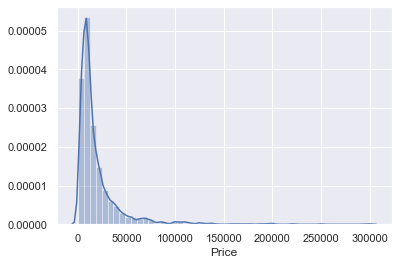

In [13]:
sns.distplot(data_no_mv['Price'])

### dealing with outliers

In [14]:
q = data_no_mv['Price'].quantile(0.99)

In [15]:
data_1 = data_no_mv[data_no_mv['Price']<q]

In [16]:
data_1.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


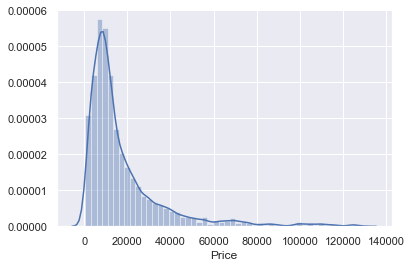

In [17]:
sns.distplot(data_1['Price'])

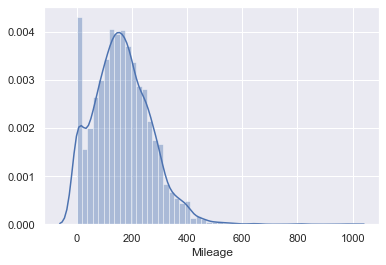

In [18]:
sns.distplot(data_1['Mileage'])

In [19]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

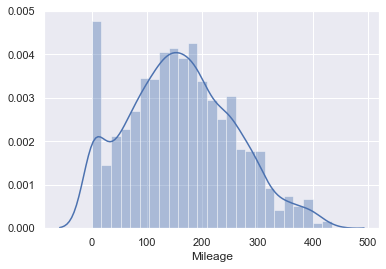

In [20]:
sns.distplot(data_2['Mileage'])

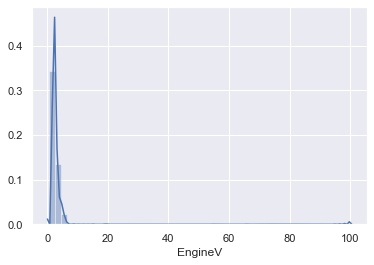

In [21]:
sns.distplot(data_2['EngineV'])

In [22]:
data_3 = data_2[data_2['EngineV']<6.5]

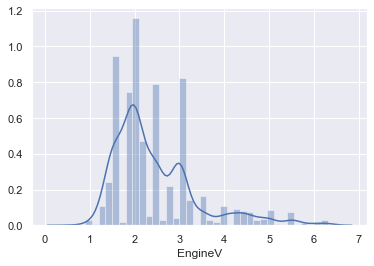

In [23]:
sns.distplot(data_3['EngineV'])

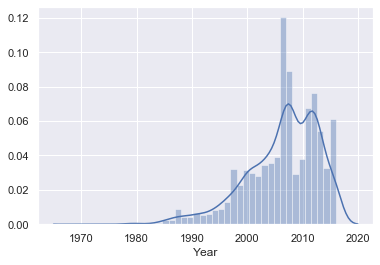

In [24]:
sns.distplot(data_3['Year'])

In [25]:
q = data_3['Year'].quantile(0.1)
data_4 = data_3[data_3['Year']>q]

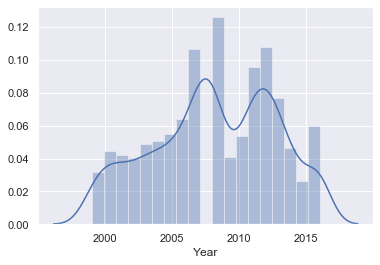

In [26]:
sns.distplot(data_4['Year'])

### defining cleaned data

In [27]:
data_cleaned = data_4.reset_index(drop =True)

In [28]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3459,3459.000000,3459,3459.000000,3459.000000,3459,3459,3459.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,762,NaN,1207,NaN,NaN,1698,3170,NaN
mean,NaN,19798.156652,NaN,147.932639,2.464053,NaN,NaN,2008.148598
std,NaN,19542.540521,NaN,86.691460,0.972008,NaN,NaN,4.575174
min,NaN,1200.000000,NaN,0.000000,0.600000,NaN,NaN,1999.000000
25%,NaN,8400.000000,NaN,85.000000,1.800000,NaN,NaN,2005.000000
50%,NaN,12850.000000,NaN,148.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,23500.000000,NaN,205.000000,3.000000,NaN,NaN,2012.000000


In [29]:
## checking ols assumptions

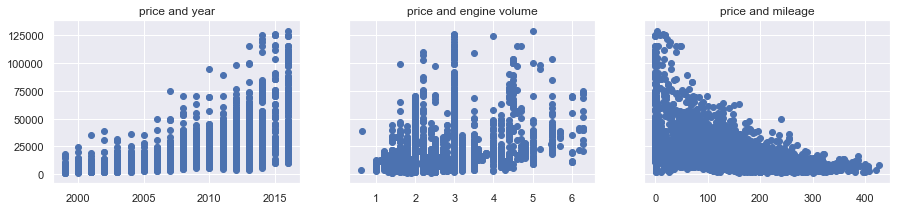

In [30]:
f , (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('price and year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('price and engine volume')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('price and mileage')
plt.show()

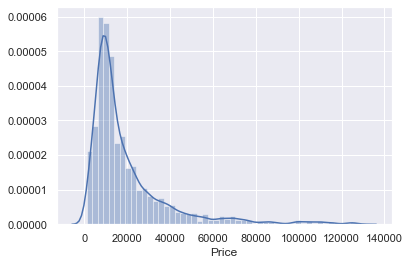

In [31]:
sns.distplot(data_cleaned['Price'])

In [32]:
log_price = np.log(data_cleaned['Price'])

In [33]:
data_cleaned['log_price'] = log_price

In [34]:
## checking multicolinearity [if vif between 1-5 acceptable, if more than 7 then drop]

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
variables = data_cleaned[['Mileage','Price','EngineV','Year']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [37]:
vif

,VIF,features
0,6.245065,Mileage
1,3.877230,Price
2,9.810690,EngineV
3,11.793924,Year


In [38]:
data_no_multicollinearity = data_cleaned.drop(['Price'],axis = 1)

In [39]:
data_no_multicollinearity

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
1,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
2,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
3,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
4,Audi,vagon,200,2.7,Diesel,yes,2006,9.560997
...,...,...,...,...,...,...,...,...
3454,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3455,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3456,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3457,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


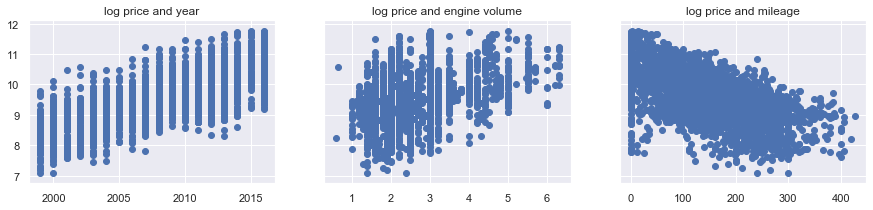

In [40]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('log price and year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('log price and engine volume')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('log price and mileage')
plt.show()

In [41]:
data_no_multicollinearity.drop(['Year'], axis = 1)

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
1,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
2,Audi,crossover,240,4.2,Petrol,yes,10.043249
3,Toyota,crossover,120,2.0,Petrol,yes,9.814656
4,Audi,vagon,200,2.7,Diesel,yes,9.560997
...,...,...,...,...,...,...,...
3454,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3455,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3456,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3457,BMW,sedan,1,3.5,Petrol,yes,8.779557


### creating dummies

In [42]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first = True)

In [43]:
data_with_dummies

,Mileage,EngineV,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,427,2.9,1999,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,358,5.0,2003,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,240,4.2,2007,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,120,2.0,2011,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,200,2.7,2006,9.560997,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3454,163,2.5,2008,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3455,35,1.6,2014,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3456,9,3.0,2014,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3457,1,3.5,1999,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


### Rearranging data according to our comfort

In [44]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'Year', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [45]:
cols = ['log_price','Mileage', 'EngineV', 'Year',  'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [46]:
data_preprocessed = data_with_dummies[cols]

In [47]:
data_preprocessed

,log_price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.974618,427,2.9,1999,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,9.495519,358,5.0,2003,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,10.043249,240,4.2,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,9.814656,120,2.0,2011,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,9.560997,200,2.7,2006,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3454,9.350102,163,2.5,2008,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3455,9.792556,35,1.6,2014,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3456,11.736069,9,3.0,2014,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3457,8.779557,1,3.5,1999,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


## preparing Linear regresion model

### Declaring variables

In [48]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis = 1)

### scaling inputs

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [50]:
inputs_scaled = scaler.transform(inputs)

### train test split

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test, y_train,y_test = train_test_split(inputs_scaled, targets, test_size = 0.2, random_state = 365)

## create regression

In [53]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
y_hat = reg.predict(x_train)

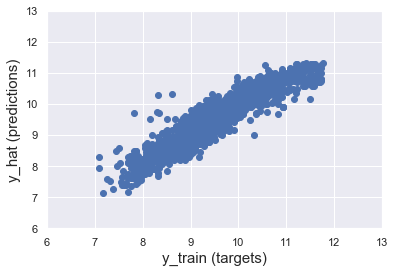

In [55]:
plt.scatter(y_train,y_hat)
plt.xlabel('y_train (targets)', size = 15)
plt.ylabel('y_hat (predictions)', size = 15)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

### Residuals PDF

Text(0.5, 1.0, 'residuals PDF')

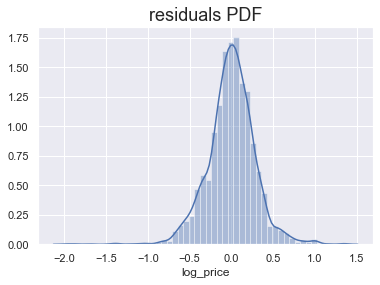

In [53]:
sns.distplot(y_train - y_hat)
plt.title('residuals PDF', size =18)

### R squared

In [54]:
reg.score(x_train, y_train)

0.8759944661291085

### Weights and Bias

In [55]:
bias = reg.intercept_
bias

9.548223407627342

In [56]:
weights = reg.coef_
weights

array([-0.10568416,  0.23846888,  0.42608276,  0.02809178,  0.00388509,
       -0.13516241, -0.21187846, -0.07914727, -0.11104891, -0.09057793,
       -0.06919769, -0.11866172, -0.08752295, -0.1487411 , -0.04433752,
       -0.02191957, -0.076347  ,  0.2236451 ])

In [57]:
summary_table = pd.DataFrame(inputs.columns.values, columns = ['Features'])
summary_table['Weights'] = weights
summary_table

,Features,Weights
0,Mileage,-0.105684
1,EngineV,0.238469
2,Year,0.426083
3,Brand_BMW,0.028092
4,Brand_Mercedes-Benz,0.003885
5,Brand_Mitsubishi,-0.135162
6,Brand_Renault,-0.211878
7,Brand_Toyota,-0.079147
8,Brand_Volkswagen,-0.111049
9,Body_hatch,-0.090578


In [58]:
data_cleaned['Brand'].unique()

array(['Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen', 'BMW',
       'Mitsubishi'], dtype=object)

## TESTING

In [59]:
y_hat_test = reg.predict(x_test)

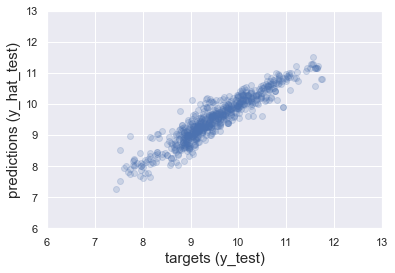

In [60]:
plt.scatter(y_test, y_hat_test, alpha = 0.2)
plt.xlabel('targets (y_test)', size = 15)
plt.ylabel('predictions (y_hat_test)', size = 15)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

### dataframe performance

In [63]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns =['predictions'])
df_pf.head()

,predictions
0,20739.530509
1,29113.715675
2,15422.450652
3,3884.001907
4,20683.784023


In [72]:
y_test = y_test.reset_index(drop = True)

In [73]:
df_pf['Targets'] = np.exp(y_test)
df_pf

,predictions,Targets
0,20739.530509,21800.0
1,29113.715675,32000.0
2,15422.450652,8499.0
3,3884.001907,5400.0
4,20683.784023,28500.0
...,...,...
687,4919.603136,6650.0
688,29837.809629,33200.0
689,3157.378621,3000.0
690,29531.755636,25500.0


In [76]:
df_pf['Residuals'] = df_pf['Targets'] - df_pf['predictions']
df_pf['difference%'] = np.absolute(df_pf['Residuals']/df_pf['Targets']*100)
df_pf

,predictions,Targets,Residuals,difference%
0,20739.530509,21800.0,1060.469491,4.864539
1,29113.715675,32000.0,2886.284325,9.019639
2,15422.450652,8499.0,-6923.450652,81.461944
3,3884.001907,5400.0,1515.998093,28.074039
4,20683.784023,28500.0,7816.215977,27.425319
...,...,...,...,...
687,4919.603136,6650.0,1730.396864,26.021005
688,29837.809629,33200.0,3362.190371,10.127079
689,3157.378621,3000.0,-157.378621,5.245954
690,29531.755636,25500.0,-4031.755636,15.810806


In [77]:
df_pf.describe()

,predictions,Targets,Residuals,difference%
count,692.000000,692.000000,692.000000,692.000000
mean,18065.003310,19243.825448,1178.822138,21.943790
std,14618.504686,19390.750145,8407.102126,24.389453
min,1438.294420,1700.000000,-16452.426542,0.022762
25%,8243.291556,8200.000000,-1903.606542,7.306371
50%,13424.097259,12450.000000,145.181093,15.337973
75%,23679.132161,22900.000000,2078.074938,28.052428
max,99741.708449,126000.000000,76465.857997,242.383254


In [81]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' %x)
df_pf.sort_values(by=['difference%'])

,predictions,Targets,Residuals,difference%
436,8802.00,8800.00,-2.00,0.02
294,18778.33,18800.00,21.67,0.12
261,17543.93,17500.00,-43.93,0.25
552,15456.78,15500.00,43.22,0.28
311,1844.03,1850.00,5.97,0.32
193,7773.65,7800.00,26.35,0.34
439,15919.12,16000.00,80.88,0.51
308,44761.29,45000.00,238.71,0.53
378,10240.53,10300.00,59.47,0.58
361,9357.66,9300.00,-57.66,0.62
